**Homomorphic Filtering dalam Pengolahan Citra Digital**

---

### 1. Konsep Dasar
Homomorphic filtering adalah teknik pemrosesan citra berbasis domain frekuensi yang digunakan untuk meningkatkan kontras dan koreksi pencahayaan. Prinsip utamanya adalah memisahkan komponen iluminasi (pencahayaan) dan reflektansi (detail citra) menggunakan transformasi logaritmik dan Fourier Transform.

Model pencahayaan citra:
$$ f(x, y) = i(x, y) \cdot r(x, y) $$
Dimana:
- $ i(x, y) $: komponen iluminasi (frekuensi rendah)
- $ r(x, y) $: komponen reflektansi (frekuensi tinggi)

Dengan mengambil logaritma:
$$
\log(f(x, y)) = \log(i(x, y)) + \log(r(x, y))
$$
Sehingga dapat diproses secara linier dalam domain frekuensi.

---

### 2. Langkah-langkah Implementasi
1. Konversi citra ke skala abu-abu dan ubah ke float.
2. Ambil logaritma citra.
3. Lakukan FFT dan geser spektrum.
4. Buat filter high-pass homomorfik.
5. Kalikan filter dengan spektrum log citra.
6. Lakukan inverse FFT.
7. Ambil eksponen dari hasilnya.
8. Normalisasi hasil.

---

### 3. Implementasi Python
```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def homomorphic_filter(img, gammaL=0.5, gammaH=2.0, c=1.0, D0=30):
    img = img.astype(np.float32) + 1  # Hindari log(0)
    log_img = np.log(img)

    M, N = img.shape
    u = np.arange(M)
    v = np.arange(N)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - M/2)**2 + (V - N/2)**2)

    H = (gammaH - gammaL) * (1 - np.exp(-c * (D**2 / (D0**2)))) + gammaL

    F = np.fft.fft2(log_img)
    F_shift = np.fft.fftshift(F)
    G_shift = H * F_shift
    G = np.fft.ifftshift(G_shift)
    img_homomorphic = np.exp(np.real(np.fft.ifft2(G))) - 1

    img_homomorphic = cv2.normalize(img_homomorphic, None, 0, 255, cv2.NORM_MINMAX)
    return img_homomorphic.astype(np.uint8)

# Contoh penggunaan
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
filtered_img = homomorphic_filter(img, gammaL=0.5, gammaH=2.0, D0=30)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Asli')
plt.subplot(1, 2, 2), plt.imshow(filtered_img, cmap='gray'), plt.title('Homomorphic Filter')
plt.show()
```

---

### 4. Eksperimen Parameter
Coba variasi parameter \( \gamma_L \), \( \gamma_H \), dan \( D_0 \) untuk melihat pengaruh pada hasil filtering.

```python
for gammaL, gammaH, D0 in [(0.3, 2.0, 10), (0.5, 2.5, 30), (0.7, 1.8, 60)]:
    filtered_img = homomorphic_filter(img, gammaL=gammaL, gammaH=gammaH, D0=D0)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f"gammaL={gammaL}, gammaH={gammaH}, D0={D0}")
    plt.axis('off')
    plt.show()
```

---

### 5. Kesimpulan
Homomorphic filtering sangat efektif untuk meningkatkan pencahayaan dan kontras citra dengan mengolah citra dalam domain logaritmik dan frekuensi. Filter ini mampu menekan iluminasi berlebih dan menonjolkan detail penting, terutama untuk citra medis, wajah, dan citra dengan pencahayaan tidak merata.

Metode ini fleksibel karena memiliki parameter yang dapat diatur sesuai kebutuhan. Evaluasi visual maupun kuantitatif seperti entropy, contrast improvement index (CII), atau PSNR bisa digunakan untuk menilai hasil filter.



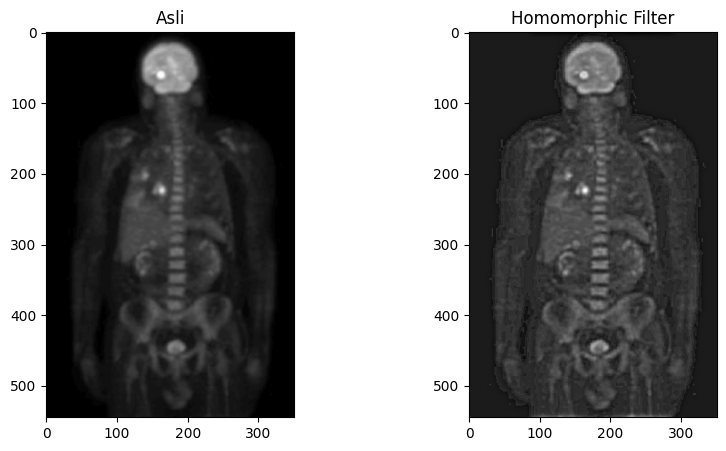

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def homomorphic_filter(img, gammaL=0.5, gammaH=2.0, c=1.0, D0=30):
    img = img.astype(np.float32) + 1  # Hindari log(0)
    log_img = np.log(img)

    M, N = img.shape
    u = np.arange(M)
    v = np.arange(N)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - M/2)**2 + (V - N/2)**2)

    H = (gammaH - gammaL) * (1 - np.exp(-c * (D**2 / (D0**2)))) + gammaL

    F = np.fft.fft2(log_img)
    F_shift = np.fft.fftshift(F)
    G_shift = H * F_shift
    G = np.fft.ifftshift(G_shift)
    img_homomorphic = np.exp(np.real(np.fft.ifft2(G))) - 1

    img_homomorphic = cv2.normalize(img_homomorphic, None, 0, 255, cv2.NORM_MINMAX)
    return img_homomorphic.astype(np.uint8)

# Contoh penggunaan
img = cv2.imread('/content/HomomorphicImage.png', cv2.IMREAD_GRAYSCALE)
filtered_img = homomorphic_filter(img, gammaL=0.5, gammaH=2.0, D0=30)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Asli')
plt.subplot(1, 2, 2), plt.imshow(filtered_img, cmap='gray'), plt.title('Homomorphic Filter')
plt.show()

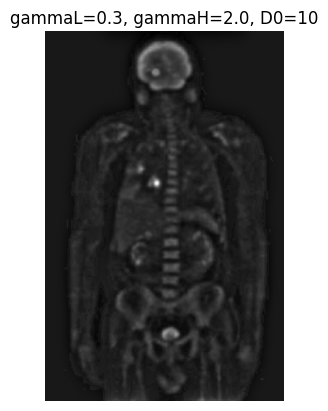

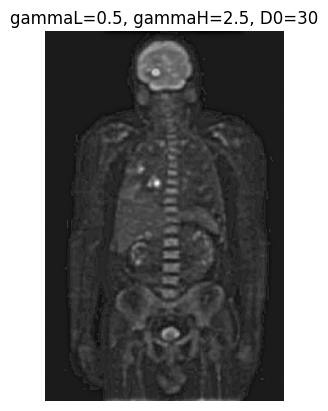

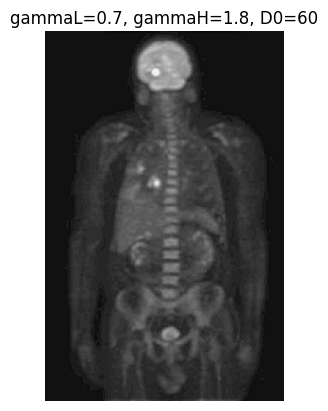

In [ ]:

for gammaL, gammaH, D0 in [(0.3, 2.0, 10), (0.5, 2.5, 30), (0.7, 1.8, 60)]:
    filtered_img = homomorphic_filter(img, gammaL=gammaL, gammaH=gammaH, D0=D0)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f"gammaL={gammaL}, gammaH={gammaH}, D0={D0}")
    plt.axis('off')
    plt.show()

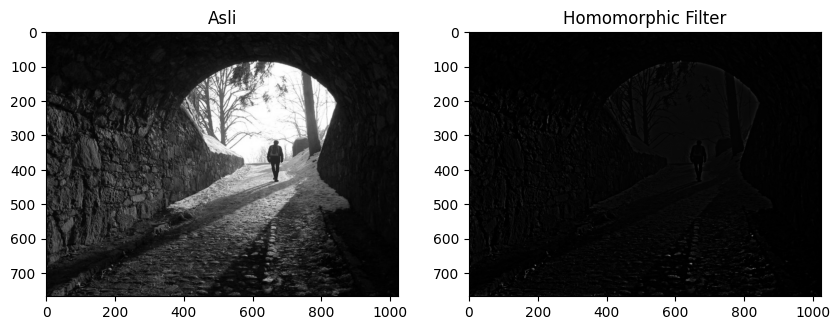

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def homomorphic_filter(img, gammaL=0.5, gammaH=2.0, c=1.0, D0=30):
    img = img.astype(np.float32) + 1  # Hindari log(0)
    log_img = np.log(img)

    M, N = img.shape
    u = np.arange(M)
    v = np.arange(N)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - M/2)**2 + (V - N/2)**2)

    H = (gammaH - gammaL) * (1 - np.exp(-c * (D**2 / (D0**2)))) + gammaL

    F = np.fft.fft2(log_img)
    F_shift = np.fft.fftshift(F)
    G_shift = H * F_shift
    G = np.fft.ifftshift(G_shift)
    img_homomorphic = np.exp(np.real(np.fft.ifft2(G))) - 1

    img_homomorphic = cv2.normalize(img_homomorphic, None, 0, 255, cv2.NORM_MINMAX)
    return img_homomorphic.astype(np.uint8)

# Contoh penggunaan
img2 = cv2.imread('/content/image2', cv2.IMREAD_GRAYSCALE)
filtered_img = homomorphic_filter(img2, gammaL=0.5, gammaH=2.0, D0=30)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img2, cmap='gray'), plt.title('Asli')
plt.subplot(1, 2, 2), plt.imshow(filtered_img, cmap='gray'), plt.title('Homomorphic Filter')
plt.show()

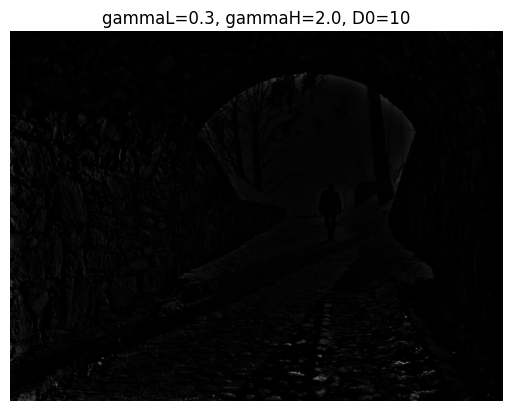

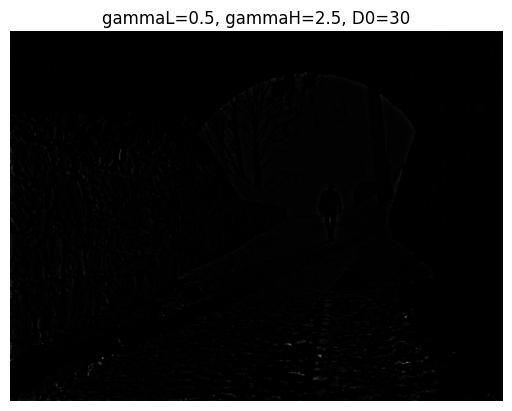

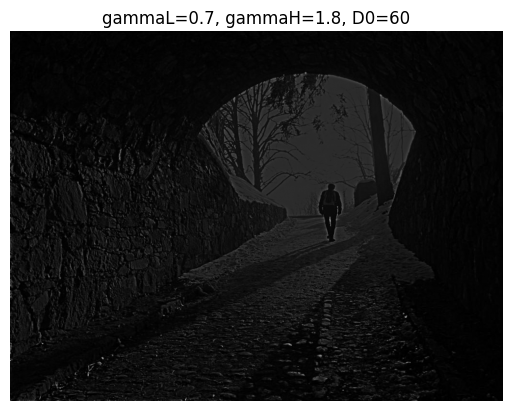

In [ ]:
for gammaL, gammaH, D0 in [(0.3, 2.0, 10), (0.5, 2.5, 30), (0.7, 1.8, 60)]:
    filtered_img2 = homomorphic_filter(img2, gammaL=gammaL, gammaH=gammaH, D0=D0)
    plt.imshow(filtered_img2, cmap='gray')
    plt.title(f"gammaL={gammaL}, gammaH={gammaH}, D0={D0}")
    plt.axis('off')
    plt.show()